<a href="https://colab.research.google.com/github/KOSETTPAI/Internship/blob/main/Simbolo_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Dataset**

In [85]:
!pip install datasets

In [86]:
import re
import datasets
from datasets import load_dataset_builder, load_dataset

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [87]:
simbolo = dataset = load_dataset("Simbolo-Servicio/wiki-burmese-sentences")
sim_train = simbolo['train']['text']

# **Sayar Ye Kyaw Thu's Sylbreak**

In [88]:
def create_break_pattern():
    """Creates and returns the regular expression pattern for Myanmar syllable breaking."""
    my_consonant = r"က-အ"
    en_char = r"a-zA-Z0-9"
    other_char = r"ဣဤဥဦဧဩဪဿ၌၍၏၀-၉၊။!-/:-@[-`{-~\s"
    subscript_symbol = r'္'
    a_that = r'်'

    # Regular expression pattern for Myanmar syllable breaking
    return re.compile(
        r"((?<!" + subscript_symbol + r")[" + my_consonant + r"]"
        r"(?!["
        + a_that + subscript_symbol + r"])"
        + r"|[" + en_char + other_char + r"])"
    )

def break_syllables(line, break_pattern, separator):
    """Applies syllable breaking rules to a line."""
    line = re.sub(r'\s+', ' ', line.strip())
    segmented_line = break_pattern.sub(separator + r"\1", line)

    # Remove the leading delimiter if it exists
    if segmented_line.startswith(separator):
        segmented_line = segmented_line[len(separator):]

    # Replace delimiter+space+delimiter with a single space
    double_delimiter = separator + " " + separator
    segmented_line = segmented_line.replace(double_delimiter, " ")

    return segmented_line

In [89]:
EOS = []

break_pattern = create_break_pattern()

for sentence in sim_train:
  EOS.append(break_syllables(sentence, break_pattern, " ").split()[-1])

EOS_unique = list(set(EOS))

EOS_frequencies = {i: EOS.count(i) for i in EOS_unique}
# EOS_frequencies

# **KO Swan Htet Aung's ReSegment**

In [90]:
def segment(text):
    text = re.sub(r'(?:(?<!္)([က-ဪဿ၊-၏]|[၀-၉]+|[^က-၏]+)(?![ှျ]?[့္်]))', r'𝕊\1', text).strip('𝕊').split('𝕊')
    return text

In [91]:
EOS_2 = []

for sentence in sim_train:
  EOS_2.append(segment(sentence)[-1])

EOS_unique1 = list(set(EOS_2))

EOS_frequencies1 = {i: EOS_2.count(i) for i in EOS_unique1}
# EOS_frequencies1

In [92]:
EOS_frequencies_over_100 = {word: freq for word, freq in EOS_frequencies1.items() if freq > 100}

In [93]:
EOS_frequencies_over_100

{')': 506,
 'ပါ': 723,
 'ပေ': 1170,
 'သည်': 81575,
 'ရ': 114,
 'ရှိ': 112,
 '၏': 9110,
 'ခြင်း': 430,
 'ဉာဏ်': 126,
 'ဘူး': 111,
 'မည်': 1015,
 'တယ်': 1481,
 'ပြီ': 252,
 'တည်း': 412,
 'ချေ': 1000,
 'ချောင်း': 106,
 'သုတ်': 415,
 'ခဲ့': 141,
 'ရက်': 210,
 '၂': 111,
 'ကြီး': 115}

In [94]:
words = list(EOS_frequencies_over_100.keys())
frequencies = list(EOS_frequencies_over_100.values())

In [95]:
fontPath = '/content/mmrtext.ttf'
prop = fm.FontProperties(fname=fontPath, size=12)

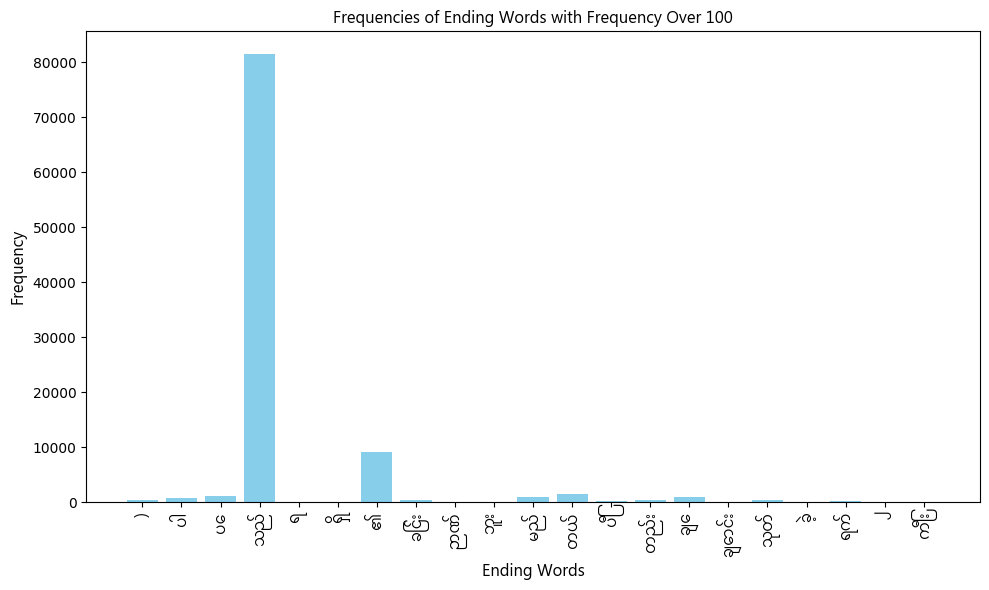

<Figure size 640x480 with 0 Axes>

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Ending Words', fontproperties=prop)
plt.ylabel('Frequency', fontproperties=prop)
plt.title('Frequencies of Ending Words with Frequency Over 100', fontproperties=prop)
plt.xticks(rotation=90, fontproperties=prop)
plt.tight_layout()
plt.show()

plt.savefig('Frequencies of Ending Words with Frequency Over 100.png')

# **String Length**

In [97]:
length = []

for sentence in sim_train:
  length.append(len(segment(sentence)))

length_unique = list(set(length))

length_frequencies1 = {i: length.count(i) for i in length_unique}
# length_frequencies1

In [98]:
length_frequencies1_over_100 = {word_length: freq for word_length, freq in length_frequencies1.items() if freq > 100}
# length_frequencies1_over_100

In [99]:
words_length = list(length_frequencies1_over_100.keys())
words_length_frequencies = list(length_frequencies1_over_100.values())

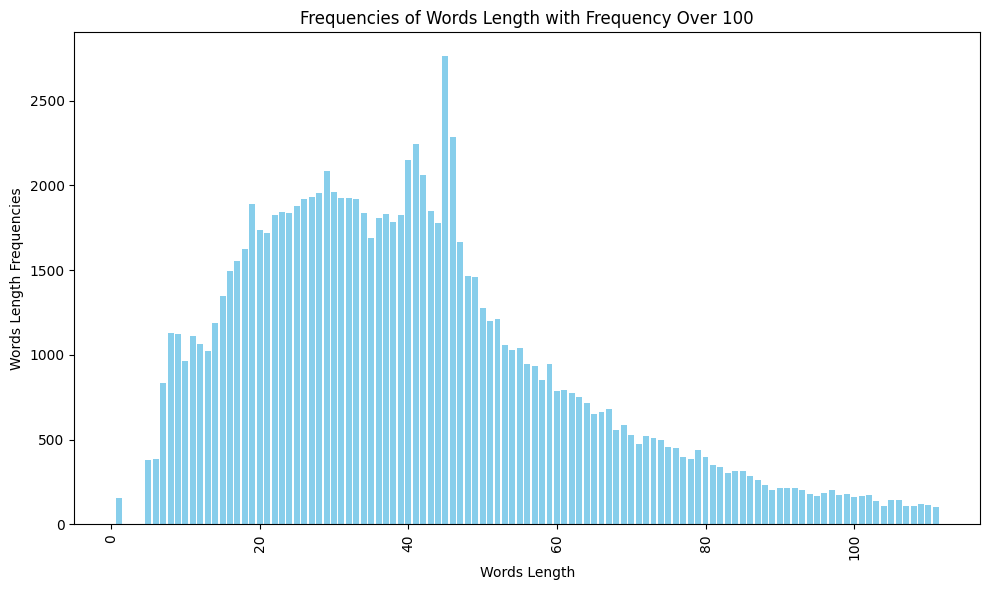

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(words_length, words_length_frequencies, color='skyblue')
plt.xlabel('Words Length')
plt.ylabel('Words Length Frequencies')
plt.title('Frequencies of Words Length with Frequency Over 100')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Pure Myanmar Sentences**

In [101]:
def eng_text(text):
  text = re.findall(r'\b[A-Za-z]+\b', text)
  return text

In [102]:
english_sentence_count = 0

for sentence in sim_train:
  english_words_in_sentence = eng_text(sentence)
  if english_words_in_sentence:
        english_sentence_count += 1

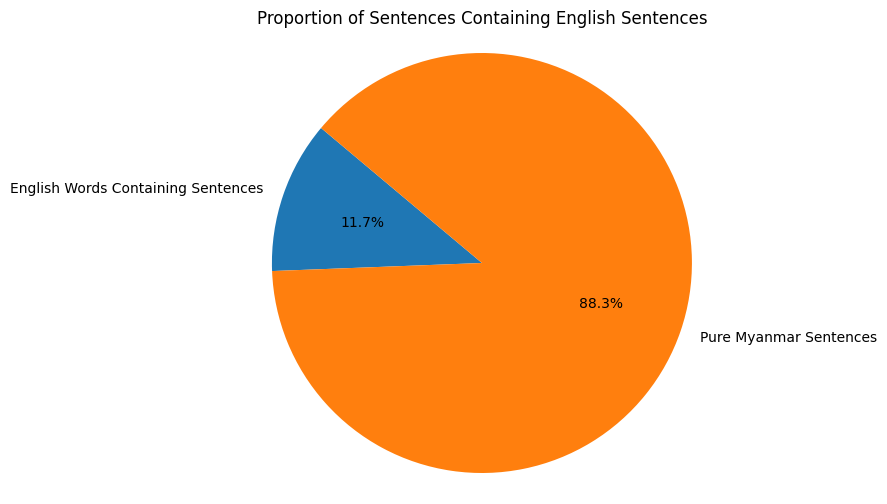

In [106]:
total_rows = len(sim_train)

english_rows = english_sentence_count

english_proportion = english_rows / total_rows

myanmar_proportion = 1 - english_proportion

labels = ['English Words Containing Sentences', 'Pure Myanmar Sentences']

sizes = [english_proportion, myanmar_proportion]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentences Containing English Sentences')
plt.axis('equal')
plt.show()

In [104]:
sim_train_100 = simbolo['train']['text'][:10]
print(len(sim_train_100))

10
